In [31]:
from qiskit import QuantumCircuit, transpile
import random
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

### Step 1: Map the problem to circuits and operators

In [2]:
def create_bell_pair(qc, a, b):
  qc.h(a)
  qc.cx(a, b)

In [3]:
def encode_message(qc, qubit, message):
  if ((message[0] != 0 | message[0] != 1) & (message[1] != 0 | message[1] != 1)):
    print("Invalid message")
    return
    
  if (message[1] == 1):
    qc.z(qubit)

  if (message[0] == 1):
    qc.x(qubit)

In [4]:
def decode(qc, a, b):
  qc.cx(a, b)
  qc.h(a)

### Primary Circuit

In [35]:
qc = QuantumCircuit(3, 2)
create_bell_pair(qc, 1, 2)

In [36]:
### Modify Qubit 0 to arbitrary state
qc.x(0)

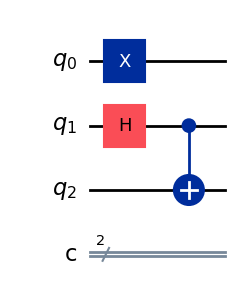

In [37]:
qc.draw(output='mpl')

In [38]:
decode(qc, 0, 1)

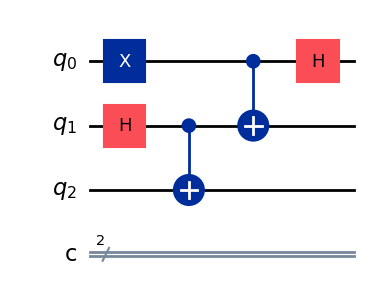

In [39]:
qc.draw(output='mpl')

In [40]:
qc.measure([0, 1], [0, 1])

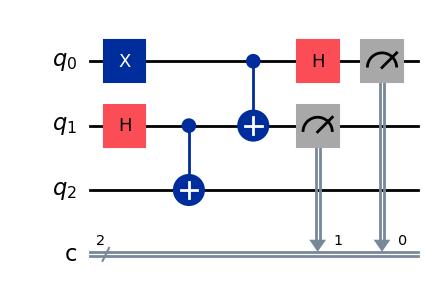

In [41]:
qc.draw(output='mpl')

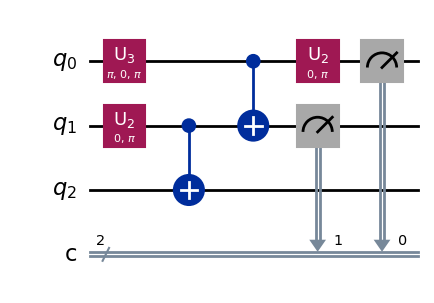

In [42]:
qc.decompose().draw(output='mpl')

### Step 2: Optimize the circuit

### Step 3: Run the circuit on a backend

In [43]:
from qiskit_aer import AerSimulator

# Create an instance of the AerSimulator backend
simulator = AerSimulator()

# Run the circuit on the backend and get the result
result = simulator.run(qc).result()

# Get the counts of the measurements
counts = result.get_counts()

# Print the cbit values
print(counts)

{'01': 277, '11': 255, '00': 232, '10': 260}


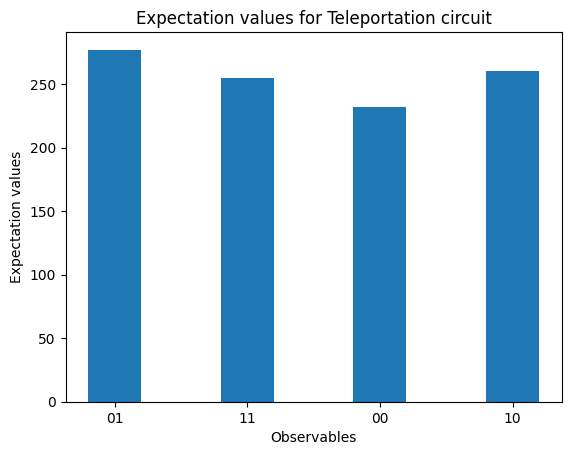

In [44]:
data = counts.keys()
values = counts.values()

plt.bar(data, values, width=0.4)
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.title('Expectation values for Teleportation circuit')
plt.show()